In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
df_10_20 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-10-20.csv").dropna()
df_10_27 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-10-27.csv").dropna()
df_11_03 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-03.csv").dropna()
df_11_10 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-10.csv").dropna()
df_11_17 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-17.csv").dropna()
df_11_22 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-22.csv").dropna()
df_12_01 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-12-01.csv").dropna()
df_12_08 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-12-08.csv").dropna()
df_12_15 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-12-15.csv").dropna()
base = pd.read_csv("../data/Spreadsheet/Lettuce/base.csv")

In [3]:
df_10_27.head()

,Nitrogen,Irrigation,Replication,Plant Number,Chlorophyll,NDVI,WP,Average Height,Average Leaf Count
0,0,0,1,104,48.9,0.805878,-4.80,6,7
2,0,0,2,104,48.8,0.839747,-4.24,4,6
4,0,0,3,104,51.9,0.812323,-4.82,7,6
6,0,25,1,104,43.7,0.814818,-1.35,6,7
8,0,25,2,104,45.8,0.826363,-1.38,8,8


In [4]:
df = pd.concat([df_10_27, df_11_03, df_11_10, df_11_17, df_11_22, df_12_01, df_12_08, df_12_15])

In [5]:
# Drop data of area with broken irrigation
df = df[(df.Nitrogen != 25) | (df.Irrigation != 0) | (df.Replication != 3)]

In [6]:
df.describe()

,Nitrogen,Irrigation,Replication,Plant Number,Chlorophyll,NDVI,WP,Average Height,Average Leaf Count
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,44.148936,44.680851,1.978723,152.875000,42.709043,0.814938,-1.722952,19.478723,17.936170
std,37.314078,36.855093,0.812945,49.700895,6.050822,0.039286,1.395958,7.746626,6.091408
min,0.000000,0.000000,1.000000,102.000000,5.700000,0.330635,-4.950000,4.000000,5.000000
25%,0.000000,25.000000,1.000000,103.750000,39.000000,0.798832,-1.950000,13.750000,13.000000
50%,50.000000,50.000000,2.000000,152.500000,42.350000,0.818785,-1.180000,19.000000,19.000000
75%,100.000000,100.000000,3.000000,202.250000,46.825000,0.837929,-0.730000,24.250000,23.000000
max,100.000000,100.000000,3.000000,204.000000,60.900000,0.896409,-0.400000,45.000000,35.000000


F_onewayResult(statistic=2293.7601341540953, pvalue=1.7309784502088271e-239)
Ttest_indResult(statistic=8.3657785386745118, pvalue=1.2656884668547413e-14)
Ttest_indResult(statistic=4.7020199775286322, pvalue=4.9410220241995466e-06)
Ttest_indResult(statistic=61.875923670653165, pvalue=3.5927819065928092e-124)
(0.76044667191771464, 4.1020158372229871e-72)


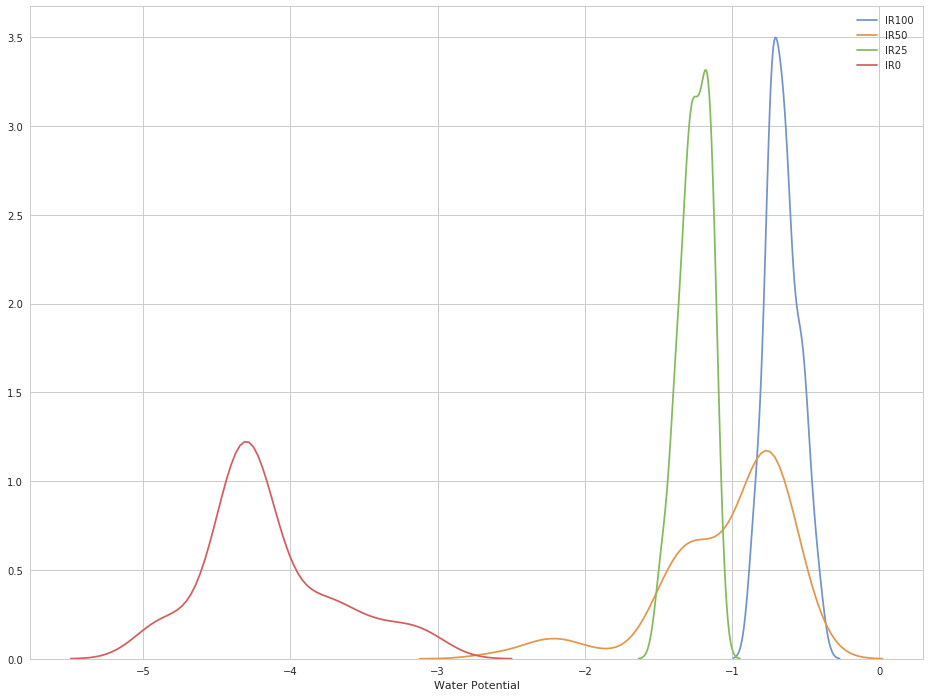

In [7]:
ir100 = df[df["Irrigation"] == 100]["WP"]
ir50 = df[df["Irrigation"] == 50]["WP"]
ir25 = df[df["Irrigation"] == 25]["WP"]
ir0 = df[df["Irrigation"] == 0]["WP"]

sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="Water Potential")
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["WP"], df["Irrigation"]))

F_onewayResult(statistic=20.701126315453269, pvalue=2.0012474841698399e-12)
Ttest_indResult(statistic=3.9162832877190046, pvalue=0.00012530320795665711)
Ttest_indResult(statistic=1.9475967235164202, pvalue=0.052936817611145083)
Ttest_indResult(statistic=1.4994293352739956, pvalue=0.13549490144770271)
(0.37624824347173746, 4.3300872088331523e-14)


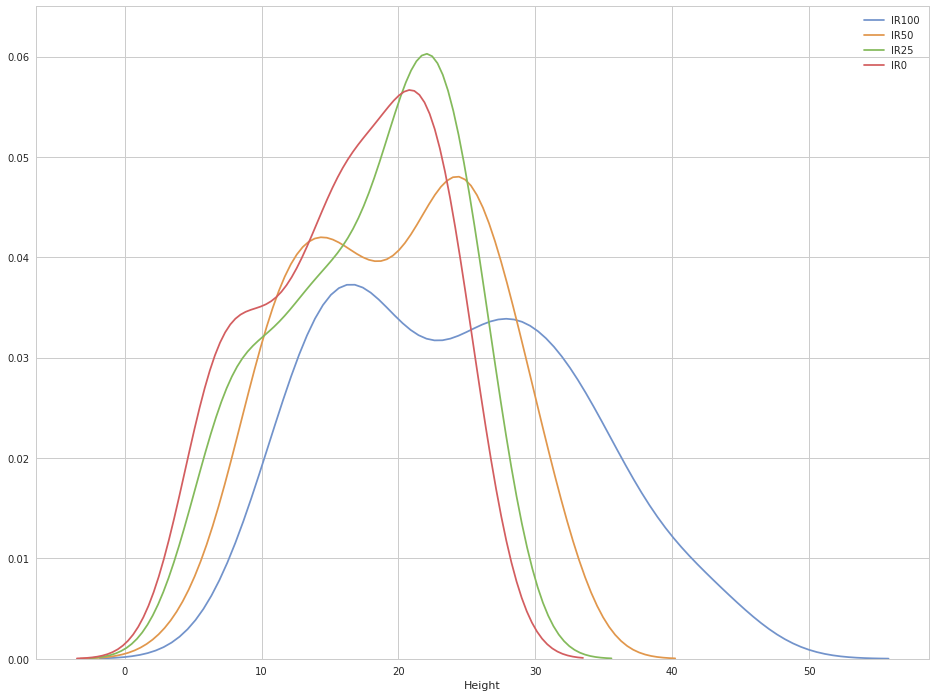

In [8]:
ir100 = df[df["Irrigation"] == 100]["Average Height"]
ir50 = df[df["Irrigation"] == 50]["Average Height"]
ir25 = df[df["Irrigation"] == 25]["Average Height"]
ir0 = df[df["Irrigation"] == 0]["Average Height"]

sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="Height")
plt.ylim(0, 0.065)
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["Average Height"], df["Irrigation"]))

F_onewayResult(statistic=7.6535473551289241, pvalue=5.6234146636027089e-05)
Ttest_indResult(statistic=2.8457355478782604, pvalue=0.0049172811142934548)
Ttest_indResult(statistic=1.3230039438793724, pvalue=0.18742407318367676)
Ttest_indResult(statistic=-0.18365626192530746, pvalue=0.8544875742009459)
(0.22951616612387704, 6.9301554542913299e-06)


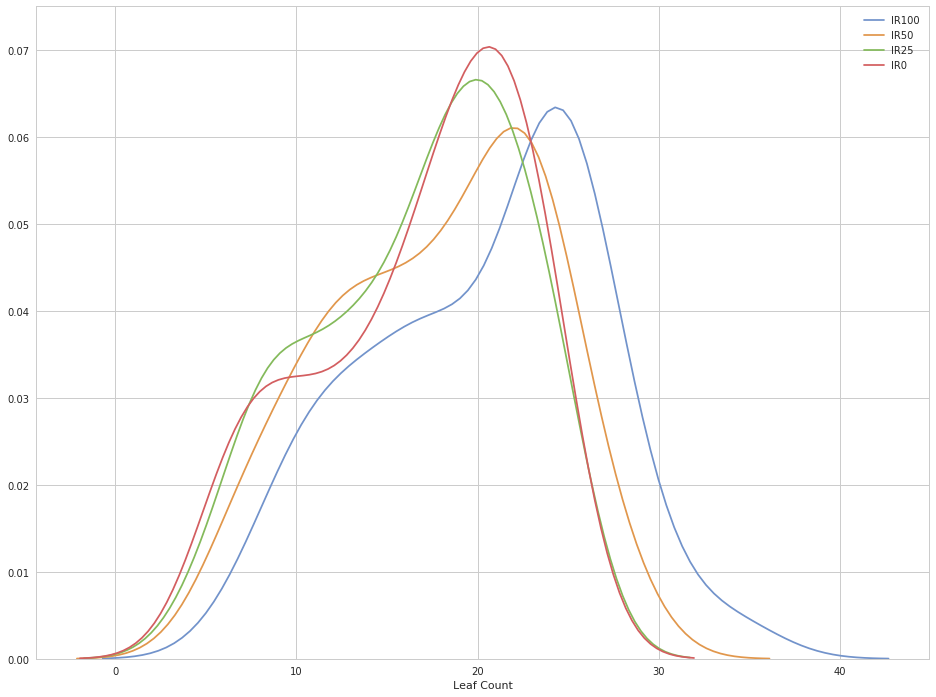

In [9]:
ir100 = df[df["Irrigation"] == 100]["Average Leaf Count"]
ir50 = df[df["Irrigation"] == 50]["Average Leaf Count"]
ir25 = df[df["Irrigation"] == 25]["Average Leaf Count"]
ir0 = df[df["Irrigation"] == 0]["Average Leaf Count"]

sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="Leaf Count")
plt.ylim(0, 0.075)
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["Average Leaf Count"], df["Irrigation"]))

F_onewayResult(statistic=0.74991029674530529, pvalue=0.52295149048783607)
Ttest_indResult(statistic=-1.0508955639806699, pvalue=0.29464133005584209)
Ttest_indResult(statistic=0.78069320574289003, pvalue=0.43595452486835218)
Ttest_indResult(statistic=-0.89711003102529674, pvalue=0.37084535247785588)
(-0.06077105161956764, 0.23977168628738918)


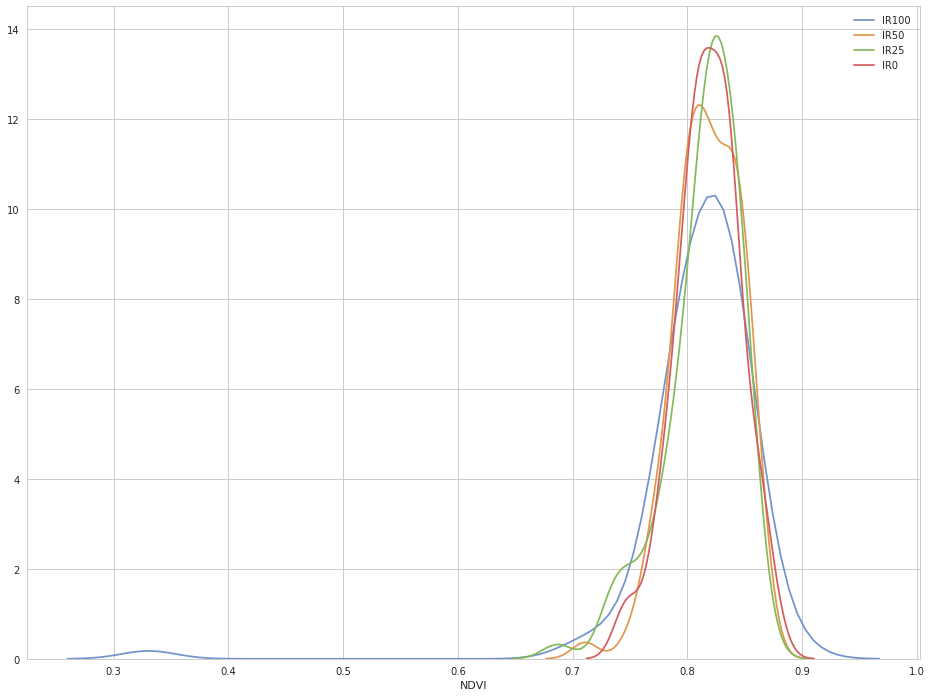

In [10]:
ir100 = df[df["Irrigation"] == 100]["NDVI"]
ir50 = df[df["Irrigation"] == 50]["NDVI"]
ir25 = df[df["Irrigation"] == 25]["NDVI"]
ir0 = df[df["Irrigation"] == 0]["NDVI"]

sns.distplot(ir100, bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(ir50,  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(ir25,  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(ir0,   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="NDVI")
plt.ylim(0, 14.5)
print(stats.f_oneway(ir100, ir50, ir25, ir0))
print(stats.ttest_ind(ir100, ir50))
print(stats.ttest_ind(ir50, ir25))
print(stats.ttest_ind(ir25, ir0))
print(stats.pearsonr(df["NDVI"], df["Irrigation"]))

F_onewayResult(statistic=2.3351911005824091, pvalue=0.073517477479586979)
Ttest_indResult(statistic=-1.3086077202681938, pvalue=0.19224794795472144)
Ttest_indResult(statistic=1.75466924421976, pvalue=0.080998712424846714)
Ttest_indResult(statistic=-2.4143700149744882, pvalue=0.016752880434221348)
(-0.077657677154921126, 0.13281451412293019)


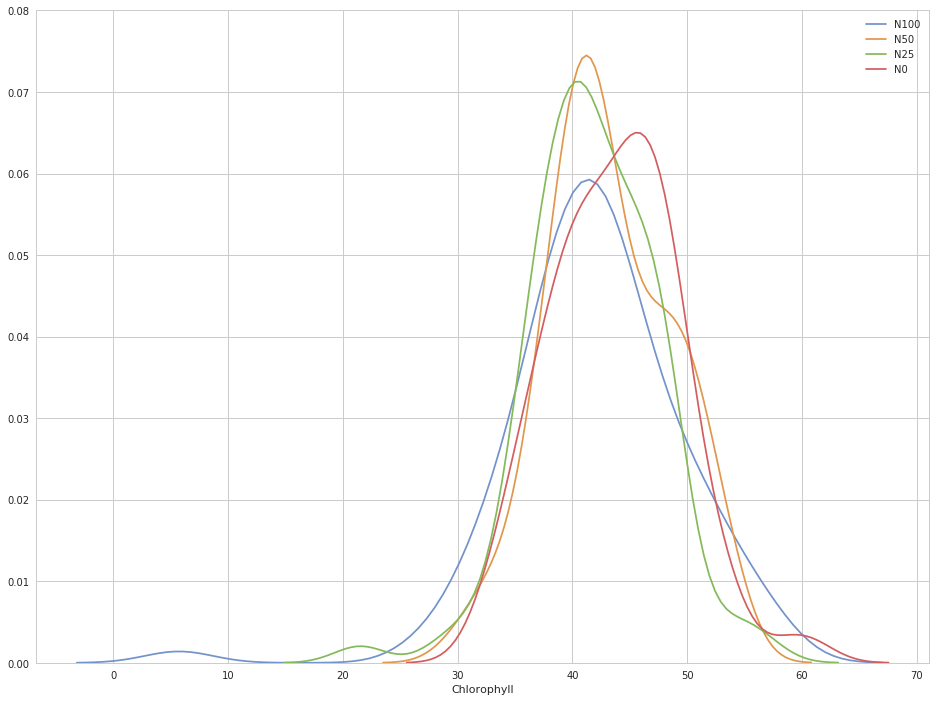

In [11]:
n100 = df[df["Nitrogen"] == 100]["Chlorophyll"]
n50 = df[df["Nitrogen"] == 50]["Chlorophyll"]
n25 = df[df["Nitrogen"] == 25]["Chlorophyll"]
n0 = df[df["Nitrogen"] == 0]["Chlorophyll"]

sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Chlorophyll")
plt.ylim(0, 0.080)
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Chlorophyll"], df["Nitrogen"]))

F_onewayResult(statistic=5.8668013688894822, pvalue=0.0006368800534593777)
Ttest_indResult(statistic=1.3791881300498898, pvalue=0.16945803335212467)
Ttest_indResult(statistic=1.1845468483827279, pvalue=0.23774123818945844)
Ttest_indResult(statistic=1.4621429334819378, pvalue=0.145426615214448)
(0.21059833800463035, 3.8498144264803496e-05)


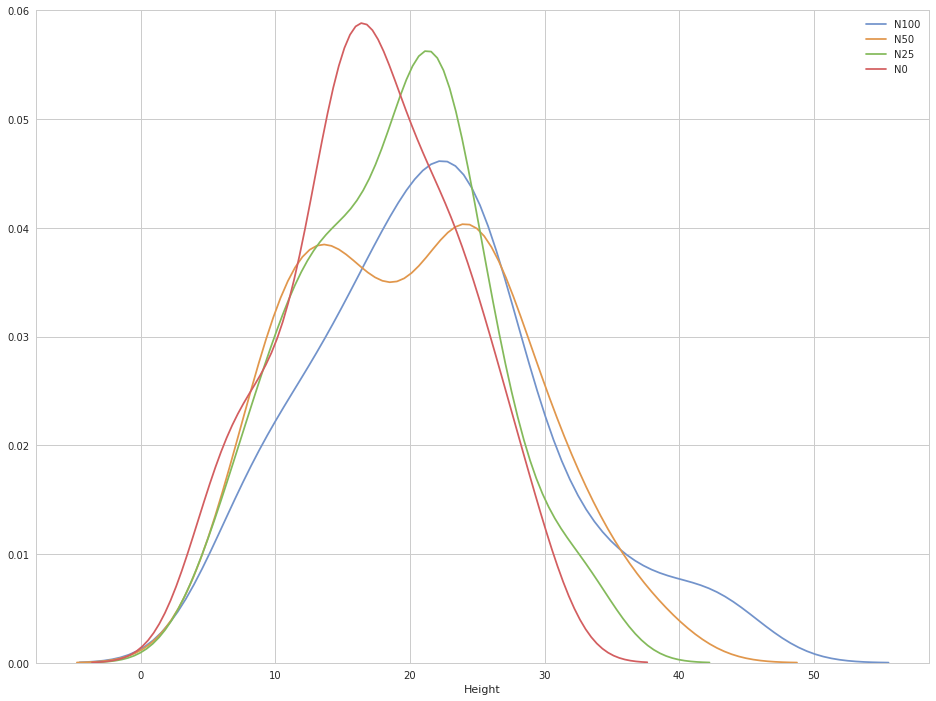

In [12]:
n100 = df[df["Nitrogen"] == 100]["Average Height"]
n50 = df[df["Nitrogen"] == 50]["Average Height"]
n25 = df[df["Nitrogen"] == 25]["Average Height"]
n0 = df[df["Nitrogen"] == 0]["Average Height"]

sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Height")
plt.ylim(0, 0.060)
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Average Height"], df["Nitrogen"]))

F_onewayResult(statistic=3.6457703516084599, pvalue=0.012893303941426165)
Ttest_indResult(statistic=-0.065540395455665271, pvalue=0.94781265350885846)
Ttest_indResult(statistic=-1.5403227864020383, pvalue=0.12521853446045583)
Ttest_indResult(statistic=3.6997642528327264, pvalue=0.00028569075048130022)
(0.0526137897895083, 0.30890267212420108)


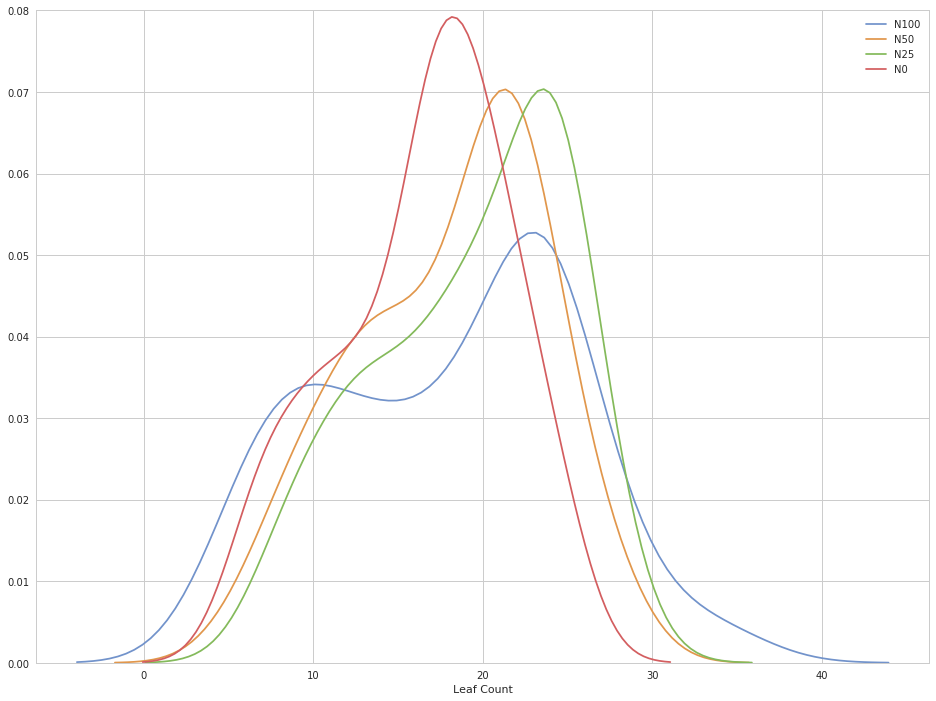

In [13]:
n100 = df[df["Nitrogen"] == 100]["Average Leaf Count"]
n50 = df[df["Nitrogen"] == 50]["Average Leaf Count"]
n25 = df[df["Nitrogen"] == 25]["Average Leaf Count"]
n0 = df[df["Nitrogen"] == 0]["Average Leaf Count"]

sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Leaf Count")
plt.ylim(0, 0.080)
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Average Leaf Count"], df["Nitrogen"]))

F_onewayResult(statistic=0.24236364724849627, pvalue=0.8667513643235315)
Ttest_indResult(statistic=-0.61722516682587125, pvalue=0.53782519190834233)
Ttest_indResult(statistic=0.30703290003959477, pvalue=0.75916934440844697)
Ttest_indResult(statistic=-0.33795002872252744, pvalue=0.73579033853920961)
(-0.037025981721572003, 0.47410533495433083)


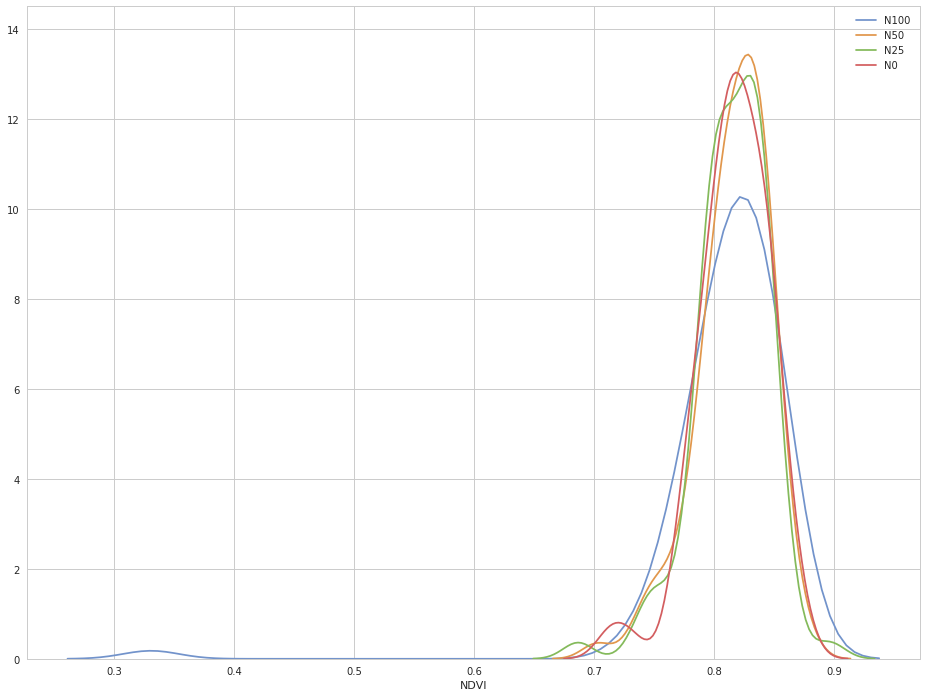

In [14]:
n100 = df[df["Nitrogen"] == 100]["NDVI"]
n50 = df[df["Nitrogen"] == 50]["NDVI"]
n25 = df[df["Nitrogen"] == 25]["NDVI"]
n0 = df[df["Nitrogen"] == 0]["NDVI"]

sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="NDVI")
plt.ylim(0, 14.5)
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["NDVI"], df["Nitrogen"]))

F_onewayResult(statistic=11.241745438530467, pvalue=4.4674949259212358e-07)
Ttest_indResult(statistic=-3.4409554978403269, pvalue=0.00071268718928607308)
Ttest_indResult(statistic=-0.52204716176305288, pvalue=0.60224557734527606)
Ttest_indResult(statistic=-1.5307425013627858, pvalue=0.12756932725882669)
(-0.28276868137090672, 2.4176718675811915e-08)


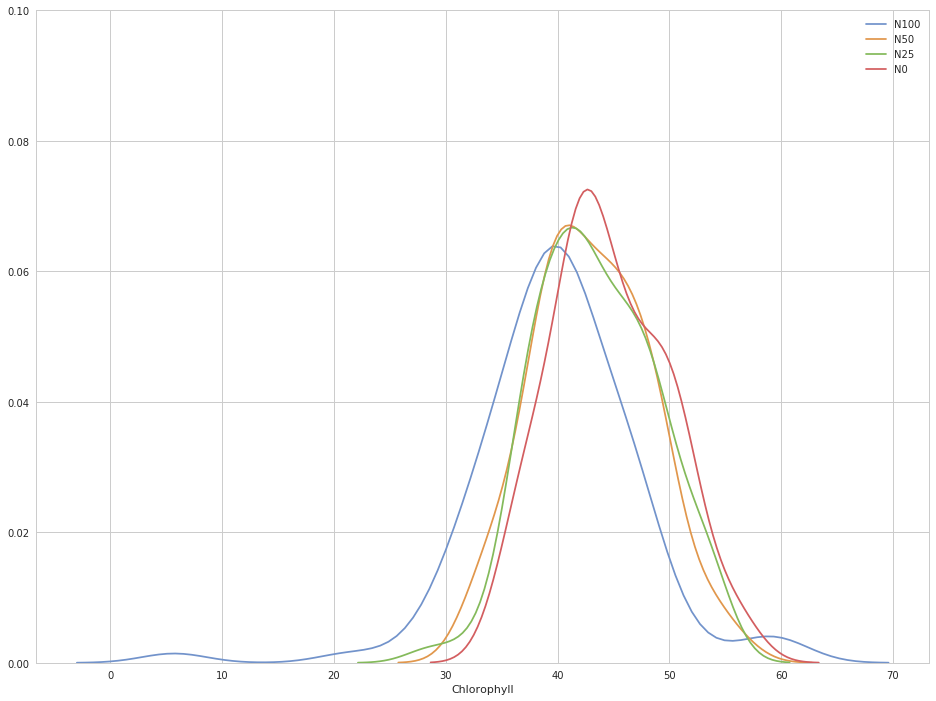

In [21]:
n100 = df[df["Irrigation"] == 100]["Chlorophyll"]
n50 = df[df["Irrigation"] == 50]["Chlorophyll"]
n25 = df[df["Irrigation"] == 25]["Chlorophyll"]
n0 = df[df["Irrigation"] == 0]["Chlorophyll"]

sns.distplot(n100, bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(n50,  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(n25,  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(n0,   bins=16, hist=False, color="#D35E60", label="N0", axlabel="Chlorophyll")
plt.ylim(0, 0.1)
print(stats.f_oneway(n100, n50, n25, n0))
print(stats.ttest_ind(n100, n50))
print(stats.ttest_ind(n50, n25))
print(stats.ttest_ind(n25, n0))
print(stats.pearsonr(df["Chlorophyll"], df["Irrigation"]))